# Data 604 Final Project

Vanita Thompson

## Supermarket Produce Simulation

This project simulates customers shopping for produce (cabbage) at a supermarket. It includes the optimal stock size, which decides the optimal stock level of cabbages that keep the number of expired cabbages to a minimum, while maintaining the number of customers unable to find a cabbage in stock to 3 in 1000 or less). I used my input values assuming cabbage rots in 7-12 days. In this simulaion they are delivered in 1-15 days, and customers purchase cabbage every 0-3 days, so these are uniformly distributed.


## Goals

- Minimize total number of rotten cabbages

## Flow Diagram

![](flow-diagram.png)

### Uniform Probability Distributions
- Customer arrival U(0, 3) days.
- Order arrival U(1, 15) days.
- Rotten time for arrived cabbage U(7, 12) days.

### Conditions
1. One customer entry.
2. Full shelves depending on your stock limit.
3. Rotten cabbage events depending on your stock limit.

For example, assume that stock = 3 is given so, starting future event list: 
```
[['cust_entry', 0], ['rotten_cabbage', 7.651], ['rotten_cabbage', 7.911], ['rotten_cabbage', 8.435]]
```

### Simulation Conditions
- When one customer left, new one's entry will be added to event list.
- One customer can only buy one cabbage.
- When a customer is arrived, one cabbage will be ordered.
- If there is no available cabbage, customer will be sad.
- If there are available cabbage(s), customer will be happy.
- When a cabbage went rotten, new one will be ordered.
- If one cabbage was bought, delete earliest future rotten cabbage event.
- Serve earliest expiry date cabbage to customer to reduce rotten cabbages and improve effiency.

### Successful Simulation Criteria
- Maximum 0.003 sad customer left rate.
- Minimize number of rotten cabbages.

### Test Simulation Performance Criteria
- Determine a stock range.
- Determine total number of trials for stock range.
- Run simulations in test loops.
- Ignore, when sad customer rate > 0.003.
- Calculate average of all valid trials for each stock size.

In [1]:
# listing_one.py

import des_oop

cust_entry = des_oop.GenerateEntityUniformDistribution(low=0,high=3)
cust_counter = des_oop.EntityCounter()
cust_leave = des_oop.TerminateEntity()

cust_entry.set_target(cust_counter)
cust_counter.set_target(cust_leave)

simulation = des_oop.Simulation([cust_entry])
simulation.run(stop_after=(cust_leave,10))  # Stop when 10 customers have left.
print(cust_counter.total_count(),"customers were simulated.")

processing_time 2.7068444298430308
set_target <built-in method __dir__ of GenerateEntityUniformDistribution object at 0x0000018C122141C8>
set_target <built-in method __dir__ of EntityCounter object at 0x0000018C121DA5C8>
run Simulation
[[<des_oop.GenerateEntityUniformDistribution object at 0x0000018C122141C8>, 2.7068444298430308]]
source block
run GenerateEntityUniformDistribution
processing_time 0.0922897375997146
non terminator and source block
run EntityCounter
terminator block
run TerminateEntity
source block
run GenerateEntityUniformDistribution
processing_time 2.0971839087535993
non terminator and source block
run EntityCounter
terminator block
run TerminateEntity
source block
run GenerateEntityUniformDistribution
processing_time 0.8320996552413477
non terminator and source block
run EntityCounter
terminator block
run TerminateEntity
source block
run GenerateEntityUniformDistribution
processing_time 0.10867620043459392
non terminator and source block
run EntityCounter
terminator 

In [2]:
# listing_two.py

import des_oop

first_cabbages = des_oop.GenerateAtStart(num=3)  # For 3 cabbages in stock.
cabbages_on_shelf = des_oop.AdvanceTimeUniformDistribution(low=7,high=12)
cabbage_rotten_cntr = des_oop.TerminateEntity()
cabbage_reorder_proc = des_oop.AdvanceTimeUniformDistribution(low=1,high=15)
cabbages_to_stock = des_oop.EntityCounter()

first_cabbages.set_target(cabbages_on_shelf)
cabbages_on_shelf.set_target(cabbage_rotten_cntr)
cabbage_rotten_cntr.set_target(cabbage_reorder_proc)
cabbage_reorder_proc.set_target(cabbages_to_stock)

simulation = des_oop.Simulation([first_cabbages])
simulation.run(stop_after=(cabbage_rotten_cntr,10))  # Stop after 10 go rotten.
print(cabbage_rotten_cntr.total_count(),"cabbages went rotten.")

processing_time 11.383109953509663
processing_time 8.751365634199809
set_target <built-in method __dir__ of GenerateAtStart object at 0x0000016A01F61F08>
set_target <built-in method __dir__ of AdvanceTimeUniformDistribution object at 0x0000016A01F4DEC8>
set_target <built-in method __dir__ of TerminateEntity object at 0x0000016A01F3E0C8>
set_target <built-in method __dir__ of AdvanceTimeUniformDistribution object at 0x0000016A01F27348>
run Simulation
[[<des_oop.GenerateAtStart object at 0x0000016A01F61F08>, 0]]
source block
source block
run AdvanceTimeUniformDistribution
terminator block
run TerminateEntity
source block
run AdvanceTimeUniformDistribution
non terminator and source block
run EntityCounter
source block
terminator block
run TerminateEntity
source block
run AdvanceTimeUniformDistribution
non terminator and source block
run EntityCounter
source block
run AdvanceTimeUniformDistribution
non terminator and source block
run EntityCounter
source block
run AdvanceTimeUniformDistrib

BEGINNING OF THE TEST

Number of trials: 100
REMAINING SIMULATION
0         

END OF THE TEST!



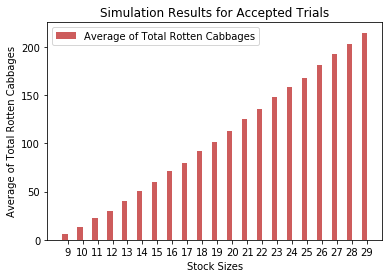

Trials for each simulation: 100
Stop condition: ('total_cus_arrived', 200)
Stock range to simulate: (3, 30)
Best stock size: 6.0
Minimum total number of rotten cabbages: 9


In [2]:
# listing_three.py

import des

trial = 100
# Generic stop_after conditions:
# - total_cus_arrived
# - happy_cus_left
# - sad_cus_left
# - time
stop_after = ('total_cus_arrived', 200)
stock_range = (3, 30)

# des.simulation(stock, stop_after)
test_results = des.test(trial, stock_range, stop_after)
best_stock_size, minimum_rott_cabbage = des.draw(test_results, stock_range)

print('Trials for each simulation:', trial)
print('Stop condition:', stop_after)
print('Stock range to simulate:', stock_range)
print('Best stock size:', best_stock_size)
print('Minimum total number of rotten cabbages:', minimum_rott_cabbage)

# Conclusion

When we lower the number of stock size, then most the customer left the market as sad, because stock size is not enough for continuous customers. However, increasing the number of stock size results in rotting much more cabbages, and it leads to waste of money.